In [1]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [2]:
#define the Joukowski transformation

def j_trans(z,c):
    """
    Joukowski transfer:
    z_trans = z + (c**2)/z
    Parameters:
    
    z: the number you want to do Joukowski transfer, it can be a complex number or an array
    c: the constant in the Joukowski transfer
    ---
    Return:
    
    j_trans: the transfer result
    """
    j_trans = z + c**2/z
    return j_trans

In [3]:
def plot_transform_result(angle1,angle2,r_start,r_end):
    theta=numpy.linspace(angle1,angle2,10)
    r=numpy.linspace(r_start,r_end,10)
    R,THETA=numpy.meshgrid(r,theta)
    x=R*numpy.cos(THETA)
    y=R*numpy.sin(THETA)
    
    z=x+1j*y
    z_trans=j_trans(z,1)
    z_trans_real=z_trans.real
    z_trans_imag=z_trans.imag
    
    pyplot.figure(figsize=[5,5])
    pyplot.scatter(z_trans_real,z_trans_imag,color='b',s=5)
    pyplot.scatter(x,y,color='r',s=5)
    pyplot.xlim(-10,10)
    pyplot.ylim(-10,10)

C:\Users\55468\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\55468\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: invalid value encountered in true_divide


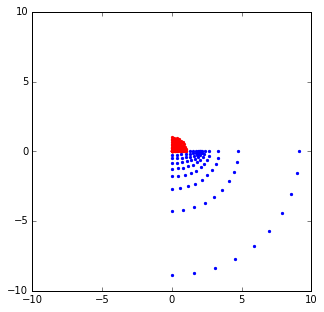

In [4]:
plot_transform_result(0,0.5*math.pi,0,1)

C:\Users\55468\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\55468\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: invalid value encountered in true_divide


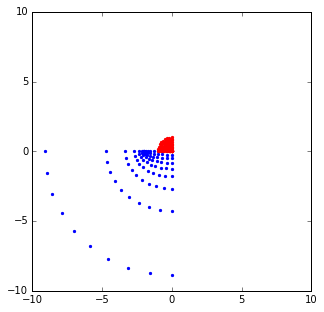

In [5]:
plot_transform_result(0.5*math.pi, math.pi,0,1)

C:\Users\55468\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\55468\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: invalid value encountered in true_divide


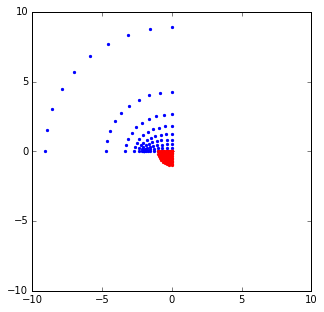

In [6]:
plot_transform_result(math.pi, 1.5*math.pi, 0, 1)

C:\Users\55468\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\55468\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: invalid value encountered in true_divide


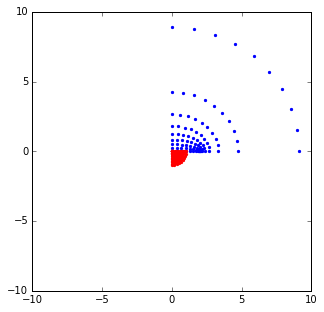

In [7]:
plot_transform_result(1.5*math.pi, 2*math.pi, 0, 1)

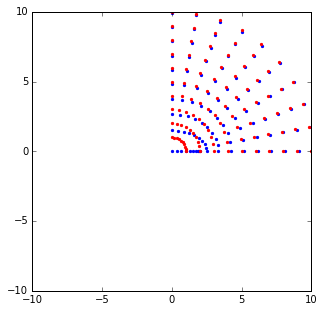

In [8]:
plot_transform_result(0,0.5*math.pi,1,10)

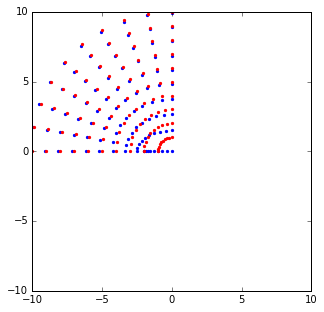

In [9]:
plot_transform_result(0.5*math.pi,math.pi,1,10)

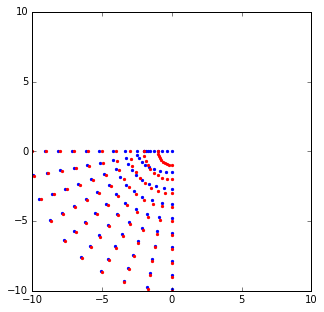

In [10]:
plot_transform_result(math.pi, 1.5*math.pi,1,10)

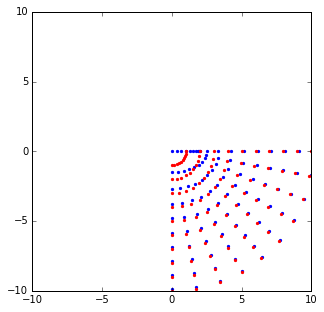

In [11]:
plot_transform_result(1.5*math.pi,2*math.pi,1,10)

we can see that when the distance between the point and the origin point is larger than 3, the influence of the transformation is much smaller, but when the radius is smaller than 2,it has a significant influence:

1, the points with x value positive concentrates around 1, and the points with x value negetive concentrates at -1, not at 0 

2, the positive y became negetive, and negetive y became positive.



In [12]:
def generate_circle(x_c,y_c,r):
    theta=numpy.linspace(0,2*math.pi,40)
    x_circle=x_c+r*numpy.cos(theta)
    y_circle=y_c+r*numpy.sin(theta)
    return x_circle,y_circle

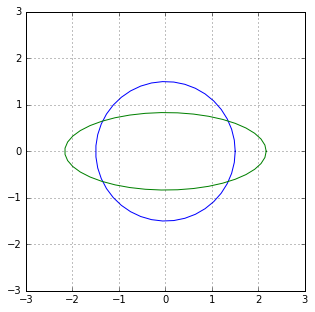

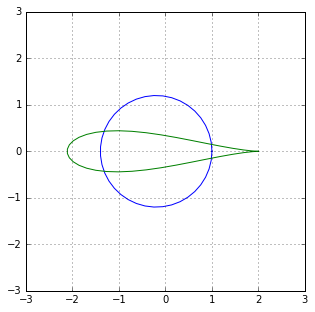

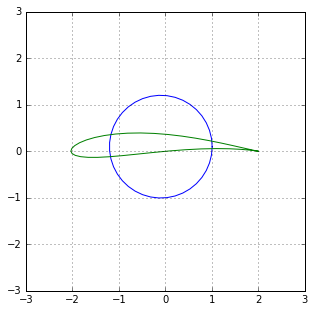

In [13]:
##Three cases in Assignment 6

#First one, centered at (0,0),radius 1.5
x,y=generate_circle(0,0,1.5)
pyplot.figure(figsize=[5,5])
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.grid(True)
pyplot.plot(x,y)

z=x+1j*y
z_trans=j_trans(z,1)
pyplot.plot(z_trans.real,z_trans.imag)

#second, centered at(-0.2,0), radius 1.2
x,y=generate_circle(-0.2,0,1.2)
pyplot.figure(figsize=[5,5])
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.grid(True)
pyplot.plot(x,y)

z=x+1j*y
z_trans=j_trans(z,1)
pyplot.plot(z_trans.real,z_trans.imag)

#third, centered at (-0.1,0.1), radius (1.22)**0.5
x,y=generate_circle(-0.1,0.1,(1.22)**0.5)
pyplot.figure(figsize=[5,5])
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.grid(True)
pyplot.plot(x,y)

z=x+1j*y
z_trans=j_trans(z,1)
pyplot.plot(z_trans.real,z_trans.imag)

the three examples used in assignment 6 has different radius, different x coordinate and y coordinate of the center, and only the second and the third case has a sharp trailing edge, the only common of the second and the third circle is that they all intersects the point (1,0). according to wikipedia, it is a a nessasary to intersects the point (1,0) to form a sharp edge, next we will try if the circle don't intersect the point (1,0). we will keep the radius and y coordinates the same as the second case, and change the x coordinate only.

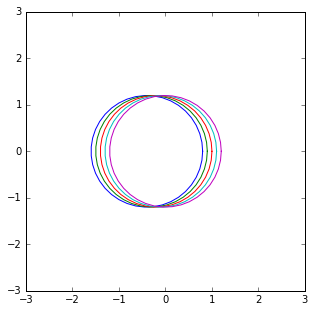

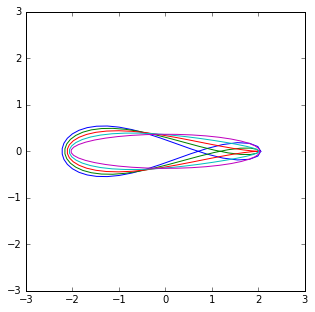

In [14]:
x_c=numpy.linspace(-0.4,0,5)
y_c=numpy.zeros_like(x_c)

x_coordinates=numpy.zeros([5,40])
y_coordinates=numpy.zeros([5,40])
for i in range(len(y_c)):
    x_coordinates[i], y_coordinates[i]=generate_circle(x_c[i],y_c[i],1.2)


pyplot.figure(figsize=[5,5])
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
for i in range(5):    
    pyplot.plot(x_coordinates[i],y_coordinates[i])

pyplot.figure(figsize=[5,5])
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
for i in range(5):
    z=x_coordinates[i]+1j*y_coordinates[i]
    z_trans=j_trans(z,1)
    pyplot.plot(z_trans.real,z_trans.imag)

the figure above is five circles, centered at -0.4(blue), -0.3(green), -0.2(red), -0.1(light blue), 0(purple), with radius 0f 1.2, and their transform result, it shows that only the one centered at -0.2(the red line) turns to the shape of an airfoil, circles centered at -0.4 and -0.3 turns to be a shape of "8", and circles centered at -0.1 and 0's trailing edge is not sharp, the shape is more close to an ellipse. 

compare this result with the three practices in assignment 6, we can see that the circle in the z plane has to intersects the point (1,0) to make the right side a sharp trailing edge.

another thing is that the thickness of the airfoil tends to be thicker on the left side than the right side. This is because the points one the left circles tends to have longer distance to the original point, 

Next we are going to try with the same value of x coordinates, different value of y coordinate of the center point of the circle, and all circles intersects with the point (1,0), that means it will have different radius as well.

we will use circles related to the third case in assignment 6, eg, all center of the circle has x coordinates -0.5,with slightly change the y coordinates and radius to keep the circle intersects (1,0)

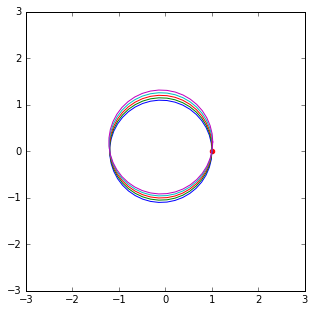

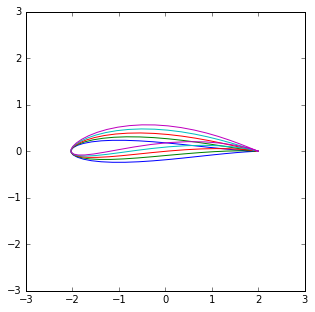

In [15]:
x_c=numpy.linspace(-0.1,-0.1,5)
y_c=numpy.linspace(0,0.2,5)
r=numpy.array([1.1,(0.05**2+1.1**2)**0.5,(0.1**2+1.1**2)**0.5,(0.15**2+1.1**2)**0.5,(0.2**2+1.1**2)**0.5])

x_coordinates=numpy.zeros([5,40])
y_coordinates=numpy.zeros([5,40])
for i in range(len(y_c)):
    x_coordinates[i], y_coordinates[i]=generate_circle(x_c[i],y_c[i],r[i])


pyplot.figure(figsize=[5,5])
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.scatter(1,0,s=20,color='r')
for i in range(5):    
    pyplot.plot(x_coordinates[i],y_coordinates[i])
######################
pyplot.figure(figsize=[5,5])
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
for i in range(5):
    z=x_coordinates[i]+1j*y_coordinates[i]
    z_trans=j_trans(z,1)
    pyplot.plot(z_trans.real,z_trans.imag)

1,leading edge 相同，因为x坐标相同
2，y坐标越大，弯曲程度越高

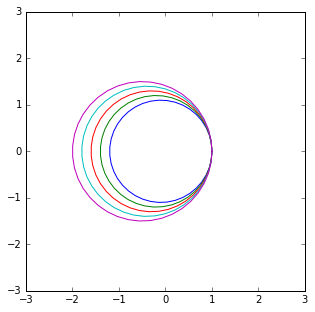

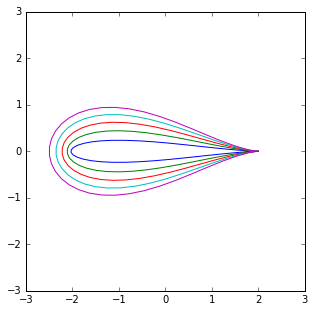

In [16]:
x_c=numpy.linspace(-0.1,-0.5,5)
y_c=numpy.linspace(0,0,5)
r=numpy.array([1.1,1.2,1.3,1.4,1.5])

x_coordinates=numpy.zeros([5,40])
y_coordinates=numpy.zeros([5,40])
for i in range(len(y_c)):
    x_coordinates[i], y_coordinates[i]=generate_circle(x_c[i],y_c[i],r[i])


pyplot.figure(figsize=[5,5])
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
for i in range(5):    
    pyplot.plot(x_coordinates[i],y_coordinates[i])

pyplot.figure(figsize=[5,5])
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
for i in range(5):
    z=x_coordinates[i]+1j*y_coordinates[i]
    z_trans=j_trans(z,1)
    pyplot.plot(z_trans.real,z_trans.imag)

长度更长，宽度更宽

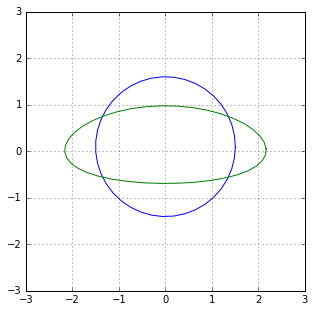

In [17]:
x,y=generate_circle(-0.,0.1,numpy.sqrt(2.26))
pyplot.figure(figsize=[5,5])
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.grid(True)
pyplot.plot(x,y)

z=x+1j*y
z_trans=j_trans(z,1)
pyplot.plot(z_trans.real,z_trans.imag)

In [18]:
#calculate the kappa of the doublet

u_inf=1
r_doublet=0
kappa=2*math.pi*(r_doublet)**2 *u_inf

In [19]:
#Z plane
def get_plane_z(xc,yc,r):
    R=numpy.linspace(r,5,101)
    THETA=numpy.linspace(0,2*math.pi,361)
    R,THETA=numpy.meshgrid(R,THETA)    
    X=xc+R*numpy.cos(THETA)
    Y=yc+R*numpy.sin(THETA)
    return X,Y

#Z transform plane
def get_plane_ztrans(X,Y):

    Z=X+1j*Y
    Z_TRANS=j_trans(Z,1)
    X_trans, Y_trans=Z_TRANS.real,Z_TRANS.imag
    return X_trans,Y_trans

def get_velocity_doublet(strength, xd, yd, X, Y):
    """Returns the velocity field generated by a doublet.
    
    Arguments
    ---------
    strength -- strength of the doublet.
    xd, yd -- coordinates of the doublet.
    X, Y -- mesh grid.
    """
    u = - strength/(2*math.pi)*((X-xd)**2-(Y-yd)**2)/((X-xd)**2+(Y-yd)**2)**2
    v = - strength/(2*math.pi)*2*(X-xd)*(Y-yd)/((X-xd)**2+(Y-yd)**2)**2
    
    return u, v

def get_stream_function_doublet(strength, xd, yd, X, Y):
    """Returns the stream-function generated by a doublet.
    
    Arguments
    ---------
    strength -- strength of the doublet.
    xd, yd -- coordinates of the doublet.
    X, Y -- mesh grid.
    """
    psi = - strength/(2*math.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)
    
    return psi
#transfer the velocity to xi plane
def velocity_transfer(u,v,c,Z):

    W_xi = (u - 1j*v)/(1-(c/Z)**2)
    u_xi = W_xi.real
    v_xi = -W_xi.imag
    
    return u_xi,v_xi

In [20]:
X,Y=get_plane_z(-0.1,0.1,numpy.sqrt(1.22))
X_trans,Y_trans=get_plane_ztrans(X,Y)

r_doublet=numpy.sqrt(1.22)
kappa=2*math.pi*(r_doublet)**2 *u_inf

u_doublet,v_doublet = get_velocity_doublet(kappa,-0.1,0.1,X,Y)
u_total=1+u_doublet
v_total=  v_doublet
U=(u_total**2 + v_total**2)**0.5
cpz=1-U**2

Z=X+1j*Y
u_total_trans,v_total_trans=velocity_transfer(u_total,v_total,1,Z)
U_trans=(u_total_trans**2 + v_total_trans**2)**0.5
cp=1-U_trans**2

psi_doublet=get_stream_function_doublet(kappa,-0.1,0.1,X,Y)
psi_total=psi_doublet+Y

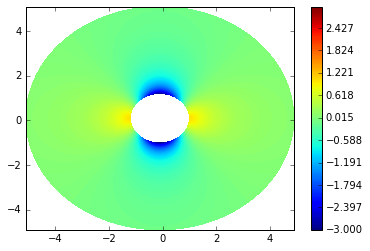

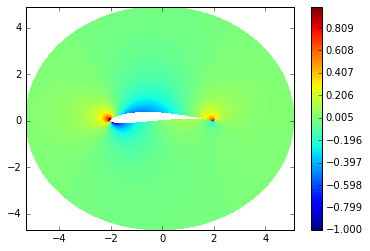

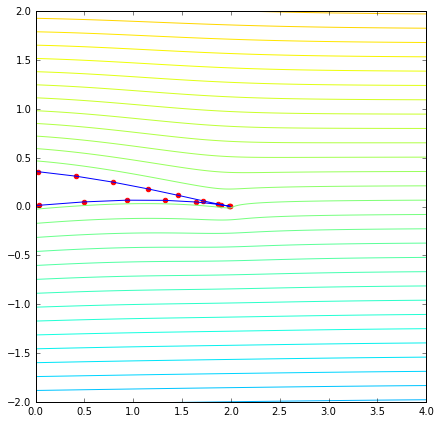

In [21]:
pyplot.figure()
conf=pyplot.contourf(X,Y,cpz,levels=numpy.linspace(-3,3,200))
pyplot.colorbar(conf)

pyplot.figure()
conff=pyplot.contourf(X_trans,Y_trans,cp,levels=numpy.linspace(-1,1,200))
pyplot.colorbar(conff)

pyplot.figure(figsize=[7,7])
pyplot.xlim(0,4)
pyplot.ylim(-2,2)
pyplot.contour(X_trans,Y_trans,psi_total,levels=numpy.linspace(-5,5,70))

r=1.1
theta=numpy.linspace(0,2*math.pi,31)
x=-0.1+r*numpy.cos(theta)
y=0.1+r*numpy.sin(theta)
z=x+1j*y
z_trans=j_trans(z,1)
pyplot.plot(z_trans.real,z_trans.imag,)
pyplot.scatter(z_trans.real,z_trans.imag,s=20,color='r')

In [32]:
AoA=numpy.arccos(0.1/(1.22)**0.5)
AoA

1.4801364395941514

In [33]:
gamma = -4*1*numpy.sin(-AoA)*math.pi*(1.22)**0.5      #-4*u_freestream*numpy.sin(-AoA)*math.pi*R_4
gamma

13.82300767579509

In [34]:
def get_velocity_vortex(strength, xv, yv, X, Y):
    """Returns the velocity field generated by a vortex.
    
    Arguments
    ---------
    strength -- strength of the vortex.
    xv, yv -- coordinates of the vortex.
    X, Y -- mesh grid.
    """
    u = + strength/(2*math.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v = - strength/(2*math.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    
    return u, v

def get_stream_function_vortex(strength, xv, yv, X, Y):
    """Returns the stream-function generated by a vortex.
    
    Arguments
    ---------
    strength -- strength of the vortex.
    xv, yv -- coordinates of the vortex.
    X, Y -- mesh grid.
    """
    psi = strength/(4*math.pi)*numpy.log((X-xv)**2+(Y-yv)**2)
    
    return psi

In [26]:
numpy.min(z_trans.real,)

-2.0275862068965518

In [28]:
numpy.where(z_trans.real==sorted(z_trans.real)[0])


(array([15], dtype=int64),)

In [29]:
numpy.where(z_trans.real==sorted(z_trans.real)[1])

(array([16], dtype=int64),)

In [31]:
AoA=(z_trans.imag[15]-z_trans.imag[16])/(z_trans.real[15]-z_trans.real[16])

In [ ]:
numpy.arc

In [ ]:
def plot_circles_transforms(x_c,y_c,r):
    for i in range(len(y_c)):
        x_coordinates[i], y_coordinates[i]=generate_circle(x_c[i],y_c[i],r)
    
    
    pyplot.figure(figsize=[5,5])
    pyplot.xlim(-5,5)
    pyplot.ylim(-5,5)
    for i in range(numpy.shape(x_coordinates)[0]):    
        pyplot.plot(x_coordinates[i],y_coordinates[i])
    
    
    pyplot.figure(figsize=[5,5])
    pyplot.xlim(-5,5)
    pyplot.ylim(-5,5)
    
    for i in range(11):
        z=x_coordinates[i]+1j*y_coordinates[i]
        z_trans=j_trans(z,1)

        pyplot.plot(z_trans.real,z_trans.imag)